### Carregando a imagem, retirada da página da Wikipedia sobre Thresholding (https://en.wikipedia.org/wiki/Thresholding_(image_processing))


*_Fonte da imagem: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Pavlovsk_Railing_of_bridge_Yellow_palace_Winter.jpg/1280px-Pavlovsk_Railing_of_bridge_Yellow_palace_Winter.jpg_*


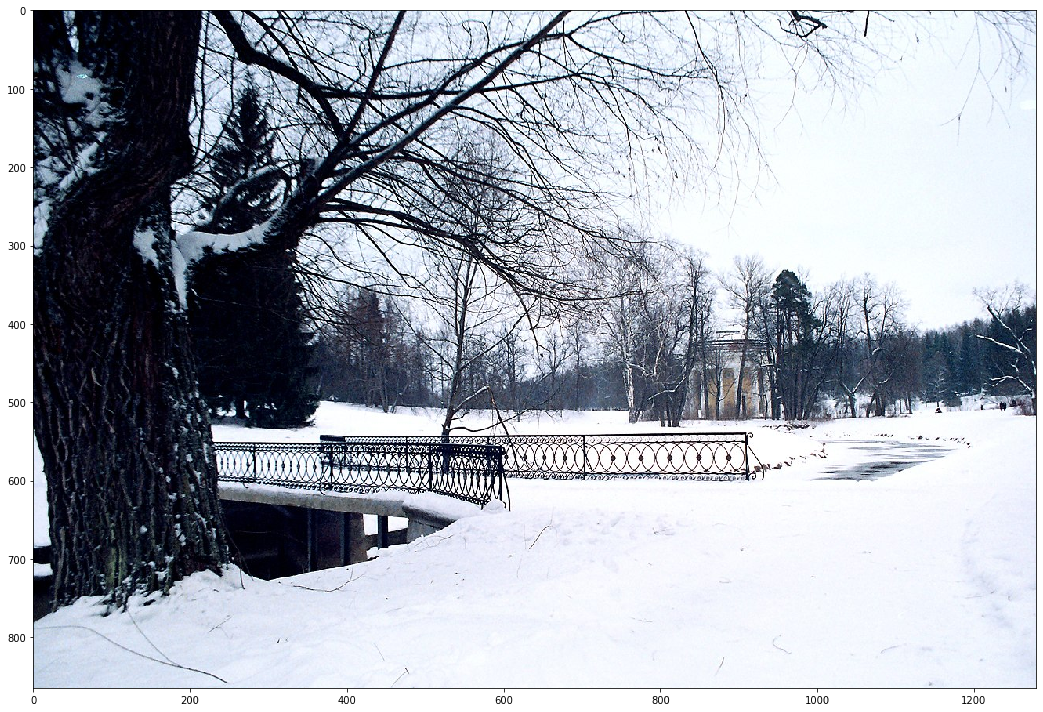

In [1]:
import skimage
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))

image = skimage.io.imread("Pavlovsk_Railing_of_bridge_Yellow_palace_Winter.jpg")
skimage.io.imshow(image)

Recorrendo a metodologia de transformação para grayscale, como feito em laboratórios anteriores

In [2]:
def grayscale(img_color):
    img_grayscale = np.ndarray((len(img_color), len(img_color[0]))) #Cria um array numpy vazio do tamanho da imagem
    for l in range(0, len(img_color)):
        for p in range(0, len(img_color[l])): 
            pixel = img_color[l][p] #Para cada pixel
            img_grayscale[l][p] = pixel.sum() / 3 #Calcula a media dos canais de cor
    return img_grayscale

grayscale_image = grayscale(image)

Para que se faça a limiarização, após carregar a imagem, precisa-se apenas iterar um operador > ou < para cada intensidade de cada pixel, como desmonstrado abaixo.

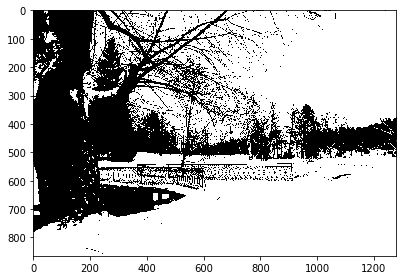

In [3]:
limiar50porCent = (grayscale_image > 128)
limiar50porCent.astype(int)
skimage.io.imshow(limiar50porCent, cmap = "gray", vmin=0, vmax=1)

Porem tambem é possível utilizar funções do skimage para calcular limiares específicos, ao exemplo do método de Otsu, utilizado para binarizar a imagem entre primeiro plano e fundo, podendo posteriormente utilizar esses limiares como feito na célula acima, assim, fazendo a limiarização própriamente dita. 

E é em concomitância a isto que fora utilizado o threshold de Otsu (como discorrido), além dos thresholds Niblack e Sauvola, para desmonstração, abaixo.

/var/data/python/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


Text(0.5, 1.0, 'Sauvola')

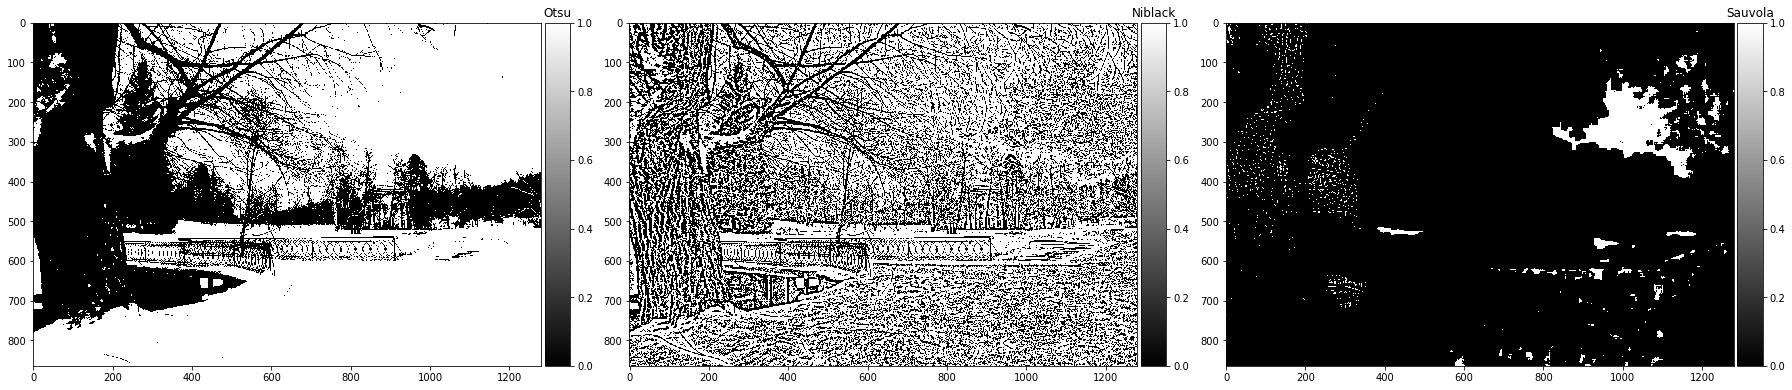

In [4]:
result = plt.figure(figsize=(25, 10))

result.add_subplot(1, 3, 1)
limiar = skimage.filters.threshold_otsu(grayscale_image)
imagem_limiarizada = (grayscale_image > limiar)
imagem_limiarizada = imagem_limiarizada.astype(int)
skimage.io.imshow(imagem_limiarizada, cmap = "gray", vmin=0, vmax=1)
plt.title("Otsu")

result.add_subplot(1, 3, 2)
limiar = skimage.filters.threshold_niblack(grayscale_image)
imagem_limiarizada = (grayscale_image > limiar)
imagem_limiarizada = imagem_limiarizada.astype(int)
skimage.io.imshow(imagem_limiarizada, cmap = "gray", vmin=0, vmax=1)
plt.title("Niblack")

result.add_subplot(1, 3, 3)
limiar = skimage.filters.threshold_sauvola(grayscale_image)
imagem_limiarizada = (grayscale_image > limiar)
imagem_limiarizada = imagem_limiarizada.astype(int)
skimage.io.imshow(imagem_limiarizada, cmap = "gray", vmin=0, vmax=1)
plt.title("Sauvola")

# Histograma

Reutilizando a imagem (em tons de cinza), para plotar o histograma, tal que é possível de ser feito pelo modulo exposure do Scikit-image, aqui, em específico, a função histogram deste modulo, ao qual retorna o histograma da imagem (tons de cinza, ou por canal).

Text(0.5, 1.0, 'Histogram')

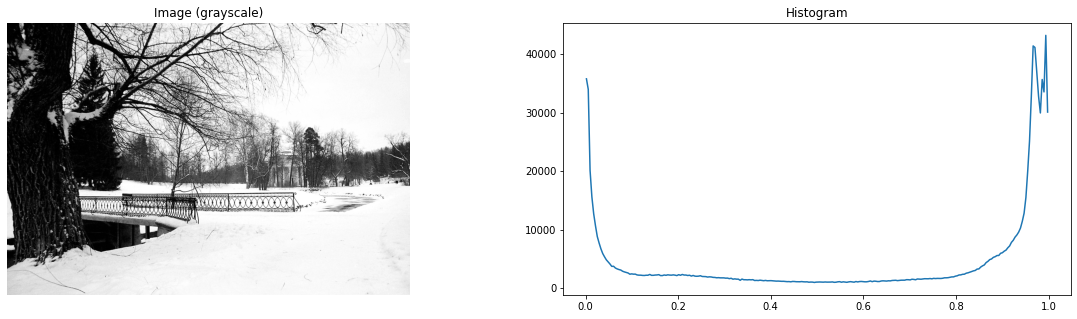

In [5]:
grayscale_image = skimage.color.rgb2gray(image)
histogram, histogram_centers = skimage.exposure.histogram(grayscale_image)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].imshow(grayscale_image, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Image (grayscale)")
ax[1].plot(histogram_centers, histogram)
ax[1].set_title('Histogram')

Agora plotando um histograma para cada canal de cor

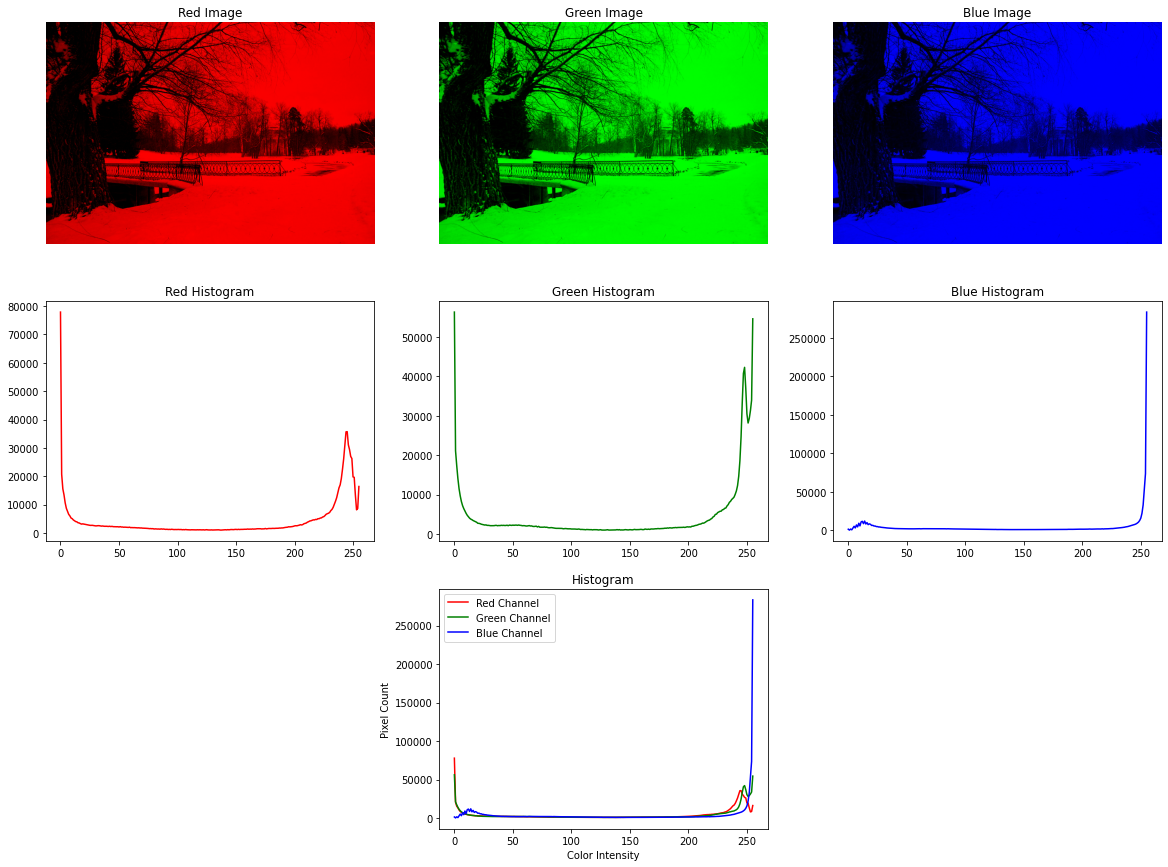

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
channels = ["Red", "Green", "Blue"]

#Para cada canal de cor
for i in range(3):

    #Extrai os valores do canal usando slicing
    channel = image[:, :, i]
    #Cria uma imagem preta para inserir os valores retirados do canal
    channelOnlyImages = np.zeros(image.shape, dtype= np.int32)
    channelOnlyImages[:, :, i] = channel

    #Plota a imagem em (tons de vermelho/azul/verde?...)
    ax[0][i].imshow(channelOnlyImages)
    ax[0][i].axis("off")
    ax[0][i].set_title(channels[i] + " Image")
    
    #Calcula o histograma da imagem
    histogram, histogram_centers = skimage.exposure.histogram(channel)
    
    #Plota o histograma de cada cor, em um subplot diferente
    ax[1][i].plot(histogram_centers, histogram, color=channels[i])
    ax[1][i].set_title(channels[i] + ' Histogram')

    #Plota o histograma do canal de cor no mesmo subplot (para comparação)
    ax[2][1].plot(histogram_centers, histogram, color=channels[i])
    ax[2][1].set_title('Histogram')

fig.delaxes(ax[2][0])
fig.delaxes(ax[2][2])
plt.xlabel('Color Intensity')
plt.ylabel('Pixel Count')
ax[2][1].legend(['Red Channel', 'Green Channel', 'Blue Channel'])

Posteriormente, pode-se utilizar da função equalize_hist do scikit-image, para equalizar os histogramas da imagem, gerando outra versão da imagem, tal função deve ser aplicada a canal histograma/canal de cor, formando na sintese destes, a imagem.

E, como é possível de se ver abaixo, utilizando da imagem gerada pela função equalize_hist, pode-se novamente gerar os histogramas para cada canal de cor.

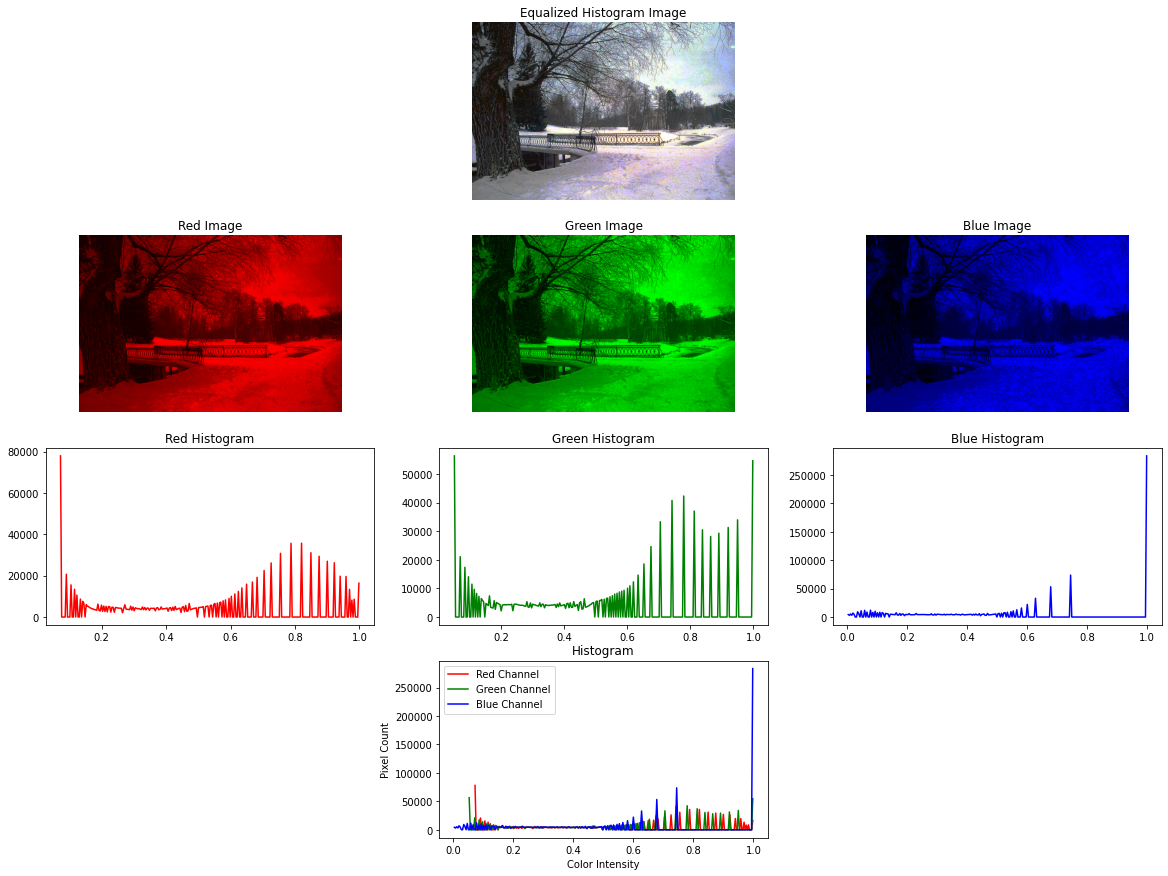

In [7]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
channels = ["Red", "Green", "Blue"]

fig.delaxes(ax[0][0])
fig.delaxes(ax[0][2])
fig.delaxes(ax[3][0])
fig.delaxes(ax[3][2])

equalized_img = np.zeros(image.shape, dtype=np.float32)

for i in range(3):

    channel = image[:, :, i]

    #Equaliza o histograma para dado canal de cor
    channel_equalized = skimage.exposure.equalize_hist(channel)
    #Novamente plota o histograma, agora equalizado
    histogram, histogram_centers = skimage.exposure.histogram(channel_equalized)

    channelOnlyImages = np.zeros(image.shape, dtype = np.float32)
    channelOnlyImages[:, :, i] = channel_equalized

    ax[1][i].imshow(channelOnlyImages)
    ax[1][i].axis("off")
    ax[1][i].set_title(channels[i] + " Image")

    ax[2][i].plot(histogram_centers, histogram, color=channels[i])
    ax[2][i].set_title(channels[i] + ' Histogram')

    ax[3][1].plot(histogram_centers, histogram, color=channels[i])
    ax[3][1].set_title('Histogram')

    #Preenche o canal de cor da imagem com histograma equalizado
    equalized_img[:, :, i] = channel_equalized


ax[0][1].imshow(equalized_img)
ax[0][1].axis("off")
ax[0][1].set_title("Equalized Histogram Image")

plt.xlabel('Color Intensity')
plt.ylabel('Pixel Count')
ax[3][1].legend(['Red Channel', 'Green Channel', 'Blue Channel'])

Mostrando a diferença entre as imagens, utilizando da função compare_images do scikit-image

(-0.5, 1279.5, 864.5, -0.5)

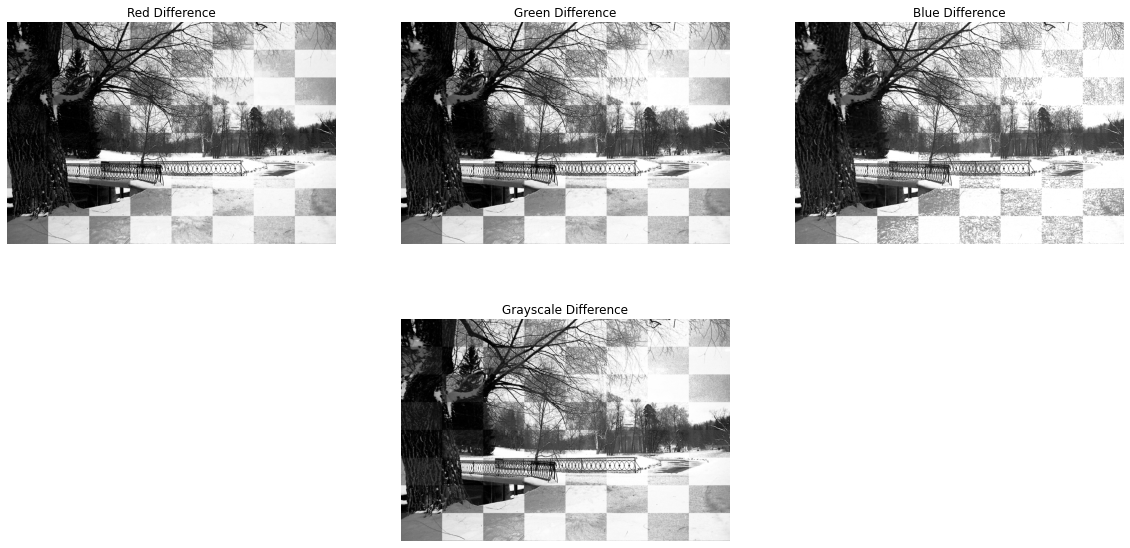

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

fig.delaxes(ax[1][0])
fig.delaxes(ax[1][2])

#Para cada canal de cor
for i in range(3):
    #Rescala os ints(0-255) em floats(0-1)
    inFloatImage = skimage.exposure.rescale_intensity(image[:, :, i], out_range=(0,1))
    inFloatEqualizedImage = skimage.exposure.rescale_intensity(equalized_img[:, :, i], out_range=(0,1))
    #Compara a imagem pelo canal de cor, entre as versões normal e com histograma equalizado
    checkBoardComp = skimage.util.compare_images(inFloatImage, inFloatEqualizedImage, method='checkerboard')
    ax[0][i].imshow(checkBoardComp, cmap="gray")
    ax[0][i].set_title(channels[i] + " Difference")
    ax[0][i].axis("off")

#Faz o mesmo para as imagens em si, histograma equalizado e normal
grayscale_image = skimage.color.rgb2gray(image)
grayscale_equalized_image = skimage.color.rgb2gray(equalized_img)
checkBoardComp = skimage.util.compare_images(grayscale_image, grayscale_equalized_image, method='checkerboard')
ax[1][1].imshow(checkBoardComp, cmap="gray")
ax[1][1].set_title("Grayscale Difference")
ax[1][1].axis("off")


Detectando se a imagem está sub/super exposta, analisado o histograma.


Detectando se a imagem está com alto/baixo contraste, baseado no histograma

## Referências:

*_https://www.cambridgeincolour.com/pt-br/tutoriais/histograms1.htm (Ultimo acesso em 20/09/2022)_*

*_https://scikit-image.org/ (Ultimo acesso em 20/09/2022)_*

*https://en.wikipedia.org/wiki/Thresholding_(image_processing) (Ultimo acesso em 20/09/2022)*

